In [323]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode
import re
from scipy import stats

In [324]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

# Datos

In [325]:
dfpropiedades=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfclean1')
dfpropiedades.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,Zonas Verdes,Supermercados / C.Comerciales,Instalación de gas,Parqueadero Visitantes,Colegios / Universidades,Parques cercanos,Zona Residencial,Closet,municipio,tipo_propiedad
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rionegro,casa


# Limpieza de los Nan 

In [326]:
def graf_num_nan(df):
        dfNan = df.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda df: (
                            df.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(df), # numero total de registros en el df original
                                    pct_missing = lambda df1 : df1.numero_Nan / df1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
        plt.figure(figsize=(20,7))
        dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
        plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
        plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
        plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
        # plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
        plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
        plt.xlabel("numero de Nan")
        plt.ylabel("Variable en orden ascendente en razon al numero de Nan")


        return dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,1314,2715,48.397790


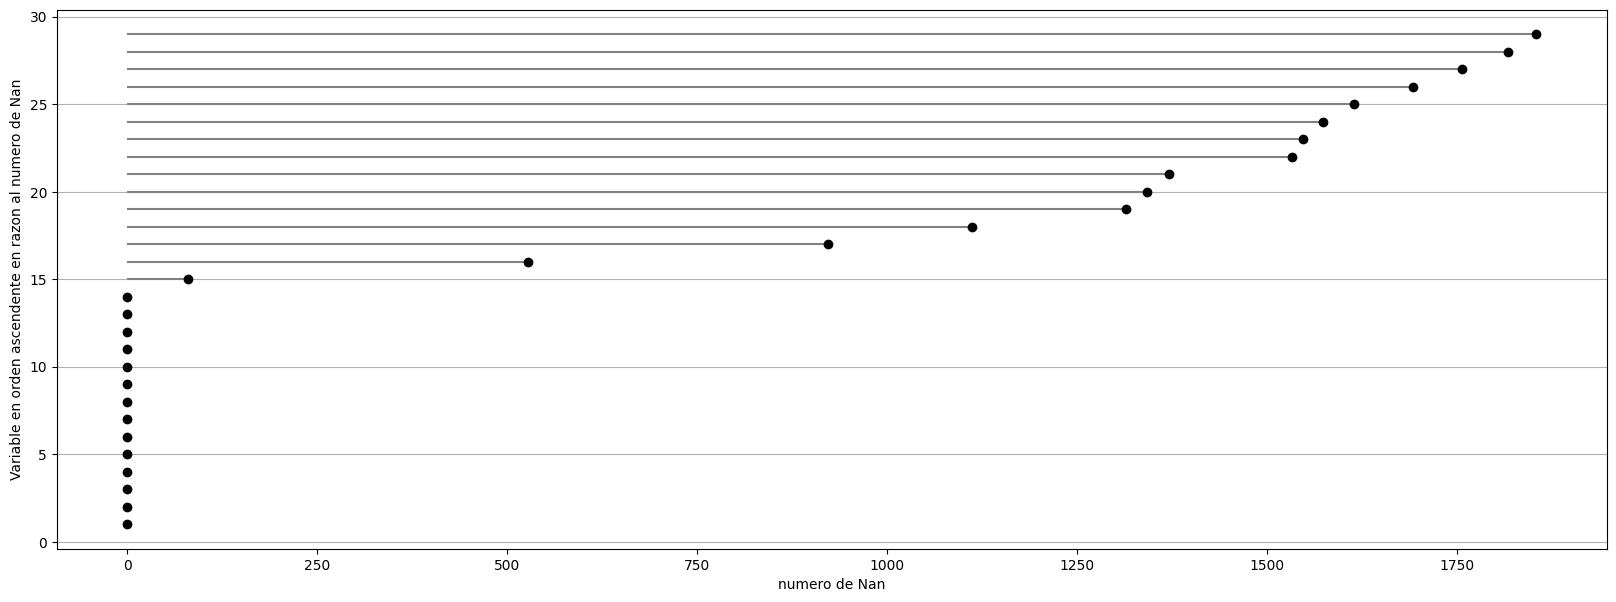

In [327]:
graf_num_nan(dfpropiedades)


Para todas las columnas excepto 
estrato y antiguedad se reemplazaran por 0

In [328]:
exclude_cols = ['antiguedad', 'estrato']

# reemplazar los valores NaN en las columnas no seleccionadas
cols_to_replace = dfpropiedades.columns[~dfpropiedades.columns.isin(exclude_cols)]
dfpropiedades[cols_to_replace] = dfpropiedades[cols_to_replace].fillna(0)

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,0,2715,0.000000


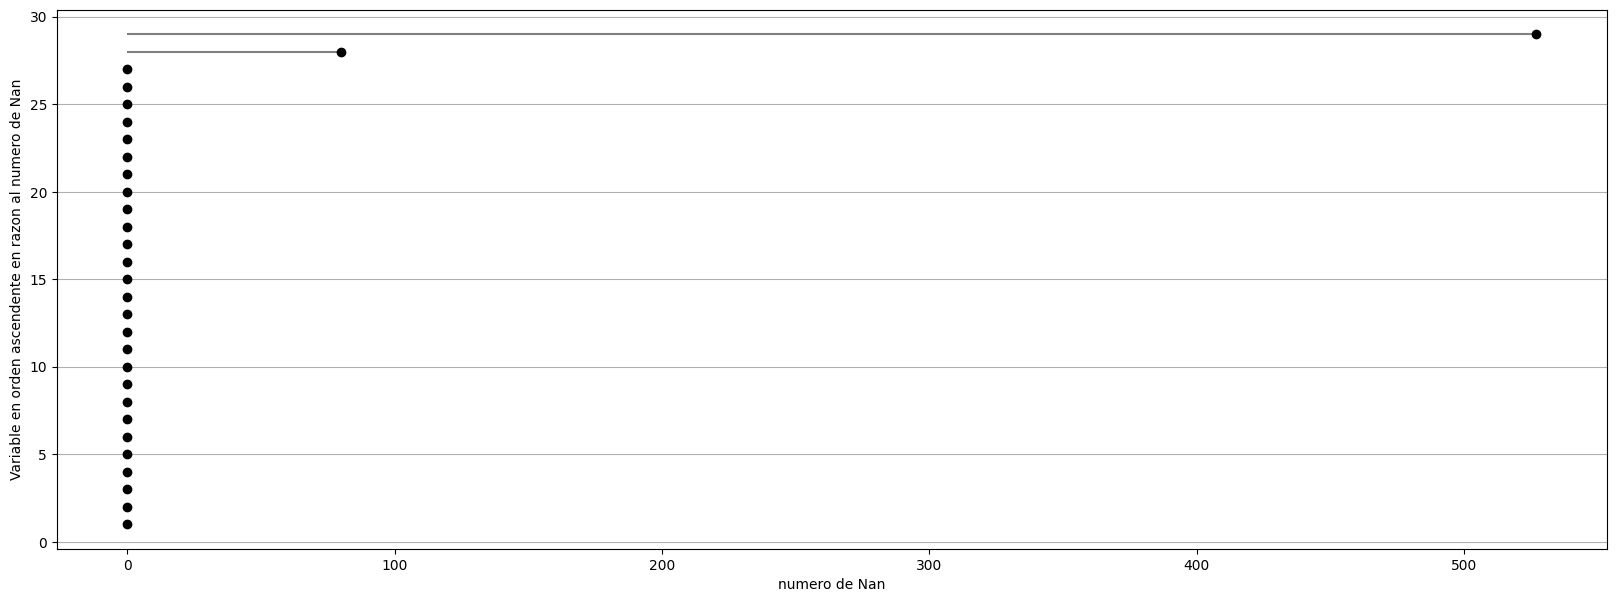

In [329]:
graf_num_nan(dfpropiedades)

# Renombramiento de columnas

Se procede a renombrar las columnas para facilitar la codificacion

In [330]:
dfpropiedades.columns=dfpropiedades.columns.map(str.lower)
dfpropiedades.columns = [unidecode(i) for i in dfpropiedades.columns]

# Arreglo de variables


Se procedera a analizar las variables y determinar que transformaciones son necesarias con el fin de realizar un mejor analisis

### Variable tipo

para la variables tipo que comprende entre usada y nueva se pasara a numero en dode usada es 0 y nueva es 1

In [331]:
dfpropiedades['tipo'] = dfpropiedades['tipo'].apply(lambda x: 0 if x == 'Usada' else 1)
dfpropiedades['tipo'].unique()

array([0, 1], dtype=int64)

### Variable precio

A esta variable se le organizara el formato para que quede en entero y ademas se le organizara la manera en que esta escrita

In [332]:
dfpropiedades['precio'][0]

'$ 1.380.000.000'

In [333]:
dfpropiedades['precio'] = dfpropiedades['precio'].apply(lambda x: int(x.replace('$', '').replace(' ', '').replace('.', '')))
dfpropiedades['precio'][0]

1380000000

### Variable area

Se eliminaran las viviendas que estan en hectareas las cuales son 143 y se pasaran los valores restantes de tipo cadena a tipo flotante

In [334]:
# dfpropiedades['medida'] = dfpropiedades['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0]) # se crea una nueva columna para calcular el numero de variables que estan en metros y las que estan en hectareas
# dfpropiedades['medida'].value_counts()

m     2587
Ha     128
Name: medida, dtype: int64

In [335]:
# dfpropiedades = dfpropiedades[~dfpropiedades['area'].str.contains('Ha|hA|HA')]

In [336]:
# dfpropiedades['medida'] = dfpropiedades['area'].apply(lambda x: re.findall('[a-zA-Z]+', x)[0])
# dfpropiedades['medida'].value_counts()

m    2587
Name: medida, dtype: int64

In [337]:
# dfpropiedades.drop('medida',axis=1,inplace=True) # se elimina la columna medida

In [338]:
# dfpropiedades['area'] = dfpropiedades['area'].apply(lambda x: re.sub('[^\d\.]', '', x)).astype(float)
# dfpropiedades['area'][0]

32000.0

In [ ]:
sns.displot(dfpropiedades['area'],bins=50)

### Variable habitacion

In [339]:
dfpropiedades.habitaciones.unique()

array(['5', '3', '4', '2', '---', '1', '7', '9', '6', 'Sin especificar',
       '12', '8', '14', '20', '21', '10', '15'], dtype=object)

In [340]:
dfpropiedades['habitaciones'] = pd.to_numeric(dfpropiedades['habitaciones'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)  # errors='coerce'  para que cualquier valor que no se pueda convertir se reemplace con NaN.
dfpropiedades['habitaciones'].unique()

array([ 5,  3,  4,  2,  0,  1,  7,  9,  6, 12,  8, 14, 20, 21, 10, 15])

### Variable baños

In [341]:
dfpropiedades['banos'] = pd.to_numeric(dfpropiedades['banos'].str.extract('(\d+)')[0], errors='coerce').fillna(0)
dfpropiedades['banos'].unique()

array([ 6.,  3.,  4.,  2.,  1.,  5.,  0.,  7.,  9.,  8., 12., 23., 10.,
       11.])

### Variable garajes

en el caso de los garajes hay algunos que tienen ams de 10, para estos les colocaremos como 11 ya que hay zonas con 10

In [342]:
dfpropiedades['garajes'].unique()

array(['2', '1', 'Sin especificar', '4', '3', '5', '8', '7', '6', '9',
       'Más de 10', '10'], dtype=object)

In [343]:
dfpropiedades['garajes'] = dfpropiedades['garajes'].apply(lambda x: int(x.replace('Más de 10', '11').replace('Sin especificar', '0')))
dfpropiedades['garajes'].unique()

array([ 2,  1,  0,  4,  3,  5,  8,  7,  6,  9, 11, 10], dtype=int64)

### Variable estrato

Para el estrato campestre (el cual tien 28 registros ) asumiremos que es estrato 3 y para los nan (los cuales son 73) tambien asumiremos lo mismo

In [344]:
(dfpropiedades['estrato']=='Campestre').sum() , (dfpropiedades['estrato'].isna().sum())

(28, 73)

In [345]:
dfpropiedades['estrato'] = dfpropiedades['estrato'].replace('Campestre', '3').astype(float)
dfpropiedades['estrato'].fillna(3,inplace=True)
dfpropiedades['estrato'].unique()

array([5., 3., 4., 2., 6., 1.])

### Variable antiguedad

para el caso de antiguedad asumiremos que las casas que estan en el mismo estrato tienden a tener los mismo años de antiguedad, por lo tanto se ordenaran por estrato y se aplicara el ffill de fillna , que cambia los nan de acuerdo a los anteriores
Adicionalmente a eso se cambiaran los siguientes valores que facilitaran su estudio y tratamiento.

* "Menos de 1 año": 0
* "1 a 8 años": 1
* "9 a 15 años": 2
* "16 a 30 años": 3
* "Más de 30 años": 4

In [346]:
# crear una columna de antiguedad ordenada
dfpropiedades['antiguedad_ordenada'] = dfpropiedades['antiguedad'].sort_values()
# completar los valores NaN con el último valor no nulo
dfpropiedades['antiguedad_ordenada'].fillna(method='ffill', inplace=True)
# asignar los valores completados a la columna original
dfpropiedades['antiguedad'] = dfpropiedades['antiguedad_ordenada']
# eliminar la columna auxiliar
dfpropiedades.drop('antiguedad_ordenada', axis=1, inplace=True)


In [347]:
cambioano = {    
    "Menos de 1 año": 0,
    "1 a 8 años": 1,
    "9 a 15 años": 2,
    "16 a 30 años": 3,
    "Más de 30 años": 4
}
dfpropiedades['antiguedad'] = dfpropiedades['antiguedad'].map(cambioano)
dfpropiedades.fillna(0,inplace=True) # esto es porque ya habia un valor de 0, no afecta en nada 
dfpropiedades['antiguedad'].unique()

array([1., 0., 4., 2., 3.])

### Analisis del arreglo de variables

Luego de organizar ciertas variables nos queda el siguiente dataframe

In [348]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2714
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2587 non-null   int64  
 1   url                            2587 non-null   object 
 2   titulo                         2587 non-null   object 
 3   precio                         2587 non-null   int64  
 4   area                           2587 non-null   float64
 5   habitaciones                   2587 non-null   int32  
 6   banos                          2587 non-null   float64
 7   garajes                        2587 non-null   int64  
 8   descripcion                    2587 non-null   object 
 9   balcon                         2587 non-null   float64
 10  trans. publico cercano         2587 non-null   float64
 11  caractint                      2587 non-null   object 
 12  caractext                      2587 non-null   o

In [349]:
dfpropiedades.isna().sum().sum() # numero de nan en el dataframe

0

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2587,0.0
1,url,0,2587,0.0
2,titulo,0,2587,0.0
3,precio,0,2587,0.0
4,area,0,2587,0.0
5,habitaciones,0,2587,0.0
6,banos,0,2587,0.0
7,garajes,0,2587,0.0
8,descripcion,0,2587,0.0
9,balcon,0,2587,0.0


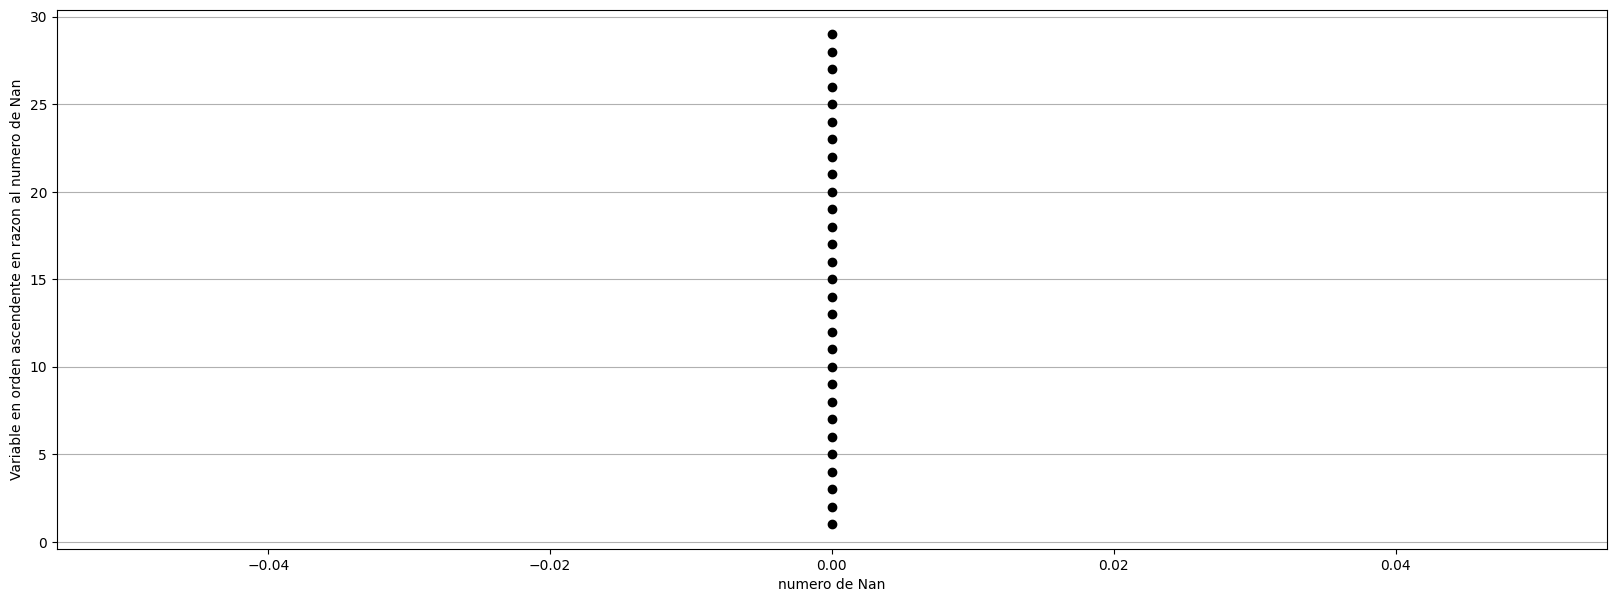

In [350]:
graf_num_nan(dfpropiedades)

# Renombramiento de columnas

In [351]:
cols = {'trans. publico cercano': 'trasn. publico',
        'cocina integral' : 'cocina', 'bano auxiliar':'bano aux',
        'zona de lavanderia' : 'zona lavanderia' , 'supermercados / c.comerciales': 'supermercado o cc',
        'nombre municipio': 'municipio', 'nombre departamento':'departamento',
        'tipo: municipio / isla / area no municipalizada':'tipo vivienda'}
dfpropiedades = dfpropiedades.rename(columns=cols)

# Deteccion de valores atipicos

In [352]:
print(f'valor inicial de registros antes de limpieza de valores atipicos {dfpropiedades.shape[0]}')

valor inicial de registros antes de limpieza de valores atipicos 2587


## Filtrado de datos

Incialmente se eliminaran los precios que esten superiores a  2.500'000.000 (dos mil quinientos millones)

In [353]:
dfpropiedades = dfpropiedades[dfpropiedades['precio']<2500000000]
dfpropiedades.shape

(2381, 29)

## Busqueda valores atipicos

se buscaran valores atipicos con el fin de tratarlos para que no afecte modelos sensibles a estos valores


In [354]:
# se divide entre 1'000.000 para facilitar lectura
(dfpropiedades['precio']/1000000).describe()

count    2381.000000
mean      684.346320
std       546.178938
min        17.500000
25%       310.000000
50%       459.000000
75%       890.000000
max      2490.000000
Name: precio, dtype: float64

z-score: El z-score es una medida estadística que indica cuántas desviaciones estándar se encuentra un valor de la media. Los valores con un z-score superior a 3 o inferior a -3 se consideran atípicos. Es muy util si los datos siguen una distribucion normal, como este no es el caso se usara otro tipo de buscador de atipicos

In [355]:
from scipy.stats import normaltest

stat, p = normaltest(dfpropiedades['precio'])

# Imprimir los resultados del test
print("Estadístico de prueba =", stat)
print("Valor p =", p)

# Interpretación del resultado del test
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula, los datos NO siguen una distribución normal.")
else:
    print("No podemos rechazar la hipótesis nula, los datos siguen una distribución normal.")


Estadístico de prueba = 534.6059509344207
Valor p = 8.161927979722847e-117
Rechazamos la hipótesis nula, los datos NO siguen una distribución normal.


Debido a que nuestros datos no siguen una distribucion normal no podemos realizar el z.score para tratar los valores faltantes y tendremos que recurrir a otros metodos

### Identificar valores atipicos 

Se realizaran algunos metodos para detectar estos valores atipicos en la variable precio y area

1. Analisis visual

In [356]:
def grafout(df):
    fig, ax = plt.subplots(ncols=2,figsize=(10,3))
    sns.kdeplot(df, shade=True, ax=ax[0]);
    sns.boxplot(df, orient='h', ax=ax[1]);

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


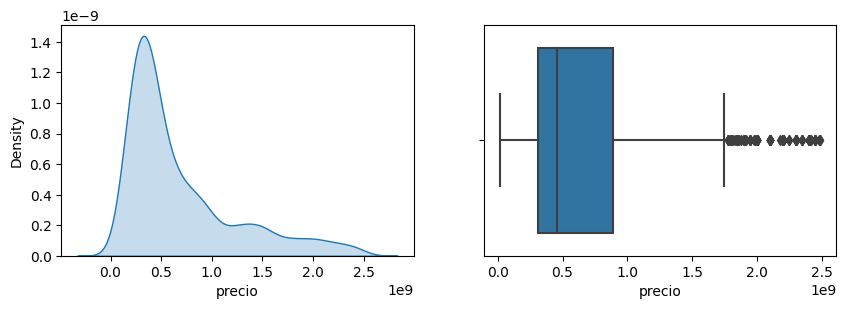

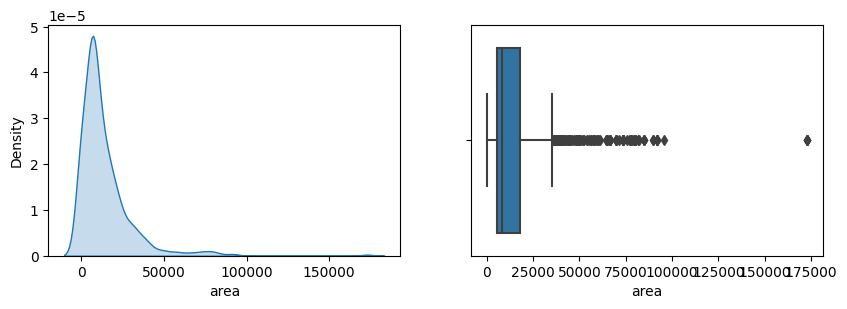

In [357]:
data = ['precio','area']
for i in data:
    grafout(dfpropiedades[i])

A simple vista podemos establecer un rango de las variables que nos permite limpiar algunos valores atipicos facilmente

In [358]:
(dfpropiedades.precio/1000000).describe()

count    2381.000000
mean      684.346320
std       546.178938
min        17.500000
25%       310.000000
50%       459.000000
75%       890.000000
max      2490.000000
Name: precio, dtype: float64

c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


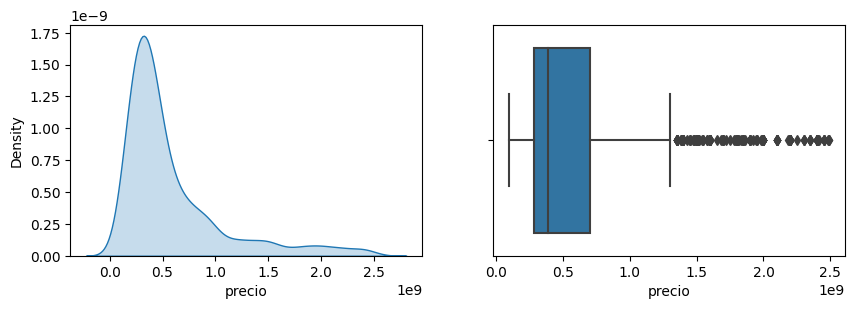

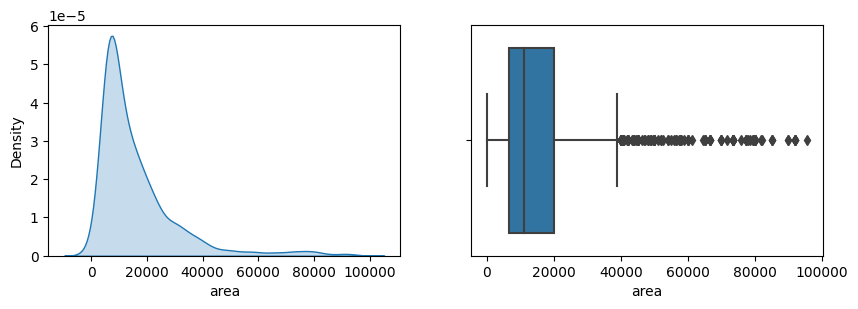

In [359]:
dfpropiedades= dfpropiedades[(dfpropiedades['area'] <= 100000)]
dfpropiedades= dfpropiedades[(dfpropiedades['area']>10)]
for i in data:
    grafout(dfpropiedades[i])

2.	Métodos de aprendizaje automático: Utiliza el algoritmo de detección de anomalías como el algoritmo de One-Class SVM (el cual consiste en encontrar una función de decisión que defina una región que contenga la mayoría de los datos y separe la región de los datos anómalos.)


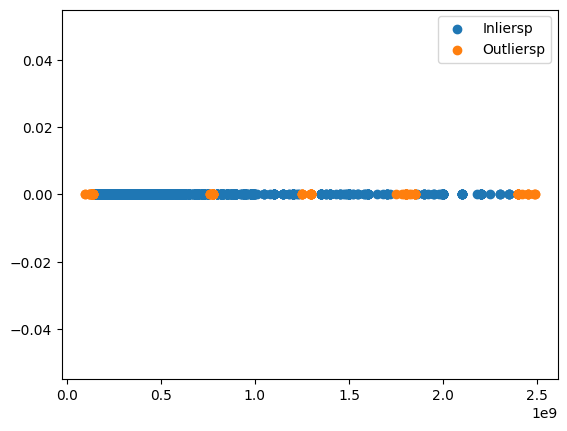

 1    1881
-1      99
Name: outlier_predictionp, dtype: int64

In [360]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(kernel='rbf', nu=0.05)
Xp = np.array(dfpropiedades['precio']).reshape(-1, 1)
clf.fit(Xp)
outlier_predictionp = clf.predict(Xp)
dfpropiedades['outlier_predictionp'] = outlier_predictionp
outliersp = dfpropiedades[dfpropiedades['outlier_predictionp'] == -1]
inliersp = dfpropiedades[dfpropiedades['outlier_predictionp'] == 1]

# representacion grafica
plt.scatter(inliersp['precio'], [0]*len(inliersp), label='Inliersp')
plt.scatter(outliersp['precio'], [0]*len(outliersp), label='Outliersp')
plt.legend()
plt.show()
dfpropiedades['outlier_predictionp'].value_counts()

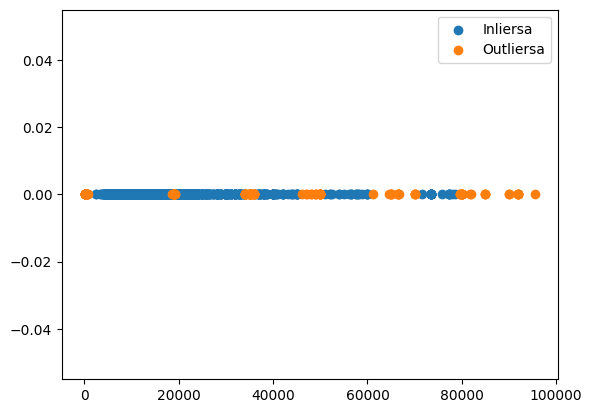

 1    1856
-1     124
Name: outlier_predictiona, dtype: int64

In [361]:
clf = OneClassSVM(kernel='rbf', nu=0.05)
Xa = np.array(dfpropiedades['area']).reshape(-1, 1)
clf.fit(Xa)
outlier_predictiona = clf.predict(Xa)
dfpropiedades['outlier_predictiona'] = outlier_predictiona
outliersa = dfpropiedades[dfpropiedades['outlier_predictiona'] == -1]
inliersa = dfpropiedades[dfpropiedades['outlier_predictiona'] == 1]

# crear el gráfico
plt.scatter(inliersa['area'], [0]*len(inliersa), label='Inliersa')
plt.scatter(outliersa['area'], [0]*len(outliersa), label='Outliersa')
plt.legend()
plt.show()
dfpropiedades['outlier_predictiona'].value_counts()

#### Conclusion de los valores atipicos

Podemos observar que tanto la serie de datos precio como area presentan valores atipicos, por lo tanto se implemento el metodo de prendizaje automatico One-class SVM para la busqueda de estos.

5. El algoritmo One-Class SVM para la columna precio encontro 140 y para area encontro 124 valores atipicos, por lo que procederemos a eliminarlos

In [362]:
print(f'cantidad de registros antes de eliminar los valores atipicos: {dfpropiedades.shape[0]}')

cantidad de registros antes de eliminar los valores atipicos: 1980


In [363]:
dfpropiedades = dfpropiedades.drop(dfpropiedades.loc[(dfpropiedades['outlier_predictionp'] == -1) |
                                                        (dfpropiedades['outlier_predictiona'] == -1)].index)
dfpropiedades = dfpropiedades.drop(labels=['outlier_predictionp', 'outlier_predictiona'], axis=1)

In [364]:
print(f'cantidad de registros despues de eliminar los valores atipicos: {dfpropiedades.shape[0]}')

cantidad de registros despues de eliminar los valores atipicos: 1771


c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Juan Guzman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


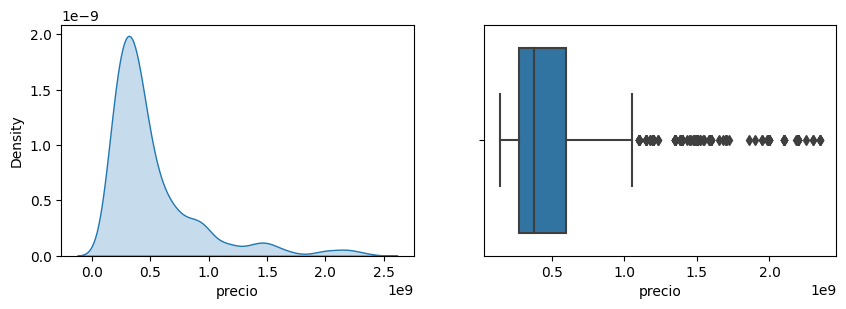

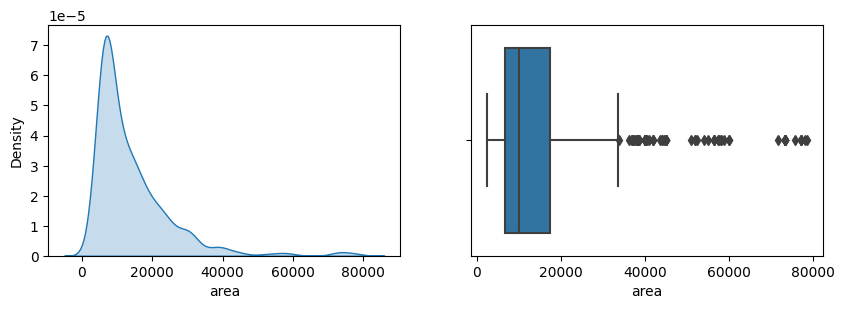

In [365]:
for i in data:
    grafout(dfpropiedades[i])

Se eliminaron 209 registros que el algoritmo detecto como otuliers tanto en la columna precio como en la de area.

# Creacion dataframe de analisis

Se creara un dataframe que contenga las varaibles relevantes para el estudio

In [368]:
dfpropiedades.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trasn. publico', 'caractint',
       'caractext', 'caractsec', 'estrato', 'antiguedad', 'cocina', 'bano aux',
       'zona lavanderia', 'zonas verdes', 'supermercado o cc',
       'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'tipo_propiedad'],
      dtype='object')

In [369]:
nocols = ['tipo','url','titulo','descripcion','caractint','caractext','caractsec']
dfdef = [col for col in dfpropiedades.columns if col not in nocols]
df = dfpropiedades[dfdef]

In [370]:
df.columns

Index(['precio', 'area', 'habitaciones', 'banos', 'garajes', 'balcon',
       'trasn. publico', 'estrato', 'antiguedad', 'cocina', 'bano aux',
       'zona lavanderia', 'zonas verdes', 'supermercado o cc',
       'instalacion de gas', 'parqueadero visitantes',
       'colegios / universidades', 'parques cercanos', 'zona residencial',
       'closet', 'municipio', 'tipo_propiedad'],
      dtype='object')

# Exportacion de datos

Ejecutar en caso de que no se tengan los datos

In [373]:
# df.to_csv('dfanalisis', index=False)

In [374]:
# dfpropiedades.to_csv('dfpropiedades', index=False)